# GuidedBackprop Visualization

## import keras model

In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

Using TensorFlow backend.


## import matplotlib, numpy, cv2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import cv2

## import vis_convolution submodule

In [3]:
from vis_convolution import load_image, VisConvolution

## read image path

In [4]:
from os import listdir
from os.path import isfile, join

img_dir = "../images/"

img_paths = [img_dir + f for f in listdir(img_dir) if isfile(join(img_dir, f))]

In [5]:
img_paths

['../images/cat.jpg',
 '../images/cat_dog.jpg',
 '../images/dorm.jpg',
 '../images/elephant.jpg',
 '../images/husky.jpg']

## visualize

In [6]:
img_width = 224
img_height = 224
activation_layer = 'block5_conv3'

model = VGG16(weights='imagenet')

visconv_backprop = VisConvolution(model, VGG16, activation_layer, 'BackProp')
visconv_deconv = VisConvolution(model, VGG16, activation_layer, 'DeconvNet')
visconv_guidedbackprop = VisConvolution(model, VGG16, activation_layer, 'GuidedBackProp')

gradients_backprop = []
gradients_deconv = []
gradients_guidedbackprop = []

for img_path in img_paths:
    img = load_image(path=img_path, target_size=(img_width, img_height))

    preds = model.predict(img)
    predicted_class = preds.argmax(axis=1)[0]
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print("predicted top1 class:", predicted_class)
    print('Predicted:', decode_predictions(preds, top=1)[0])
    # Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

    gradients_backprop.append(visconv_backprop.generate(img))
    gradients_deconv.append(visconv_deconv.generate(img))
    gradients_guidedbackprop.append(visconv_guidedbackprop.generate(img))

predicted top1 class: 278
Predicted: [('n02119789', 'kit_fox', 0.38026658)]
predicted top1 class: 243
Predicted: [('n02108422', 'bull_mastiff', 0.30604088)]
predicted top1 class: 698
Predicted: [('n03877845', 'palace', 0.6393265)]
predicted top1 class: 386
Predicted: [('n02504458', 'African_elephant', 0.7191398)]
predicted top1 class: 248
Predicted: [('n02109961', 'Eskimo_dog', 0.5947469)]


## Plot result

In [7]:
import sys
sys.path.insert(0, '../utils')

from utils import deprocess_image

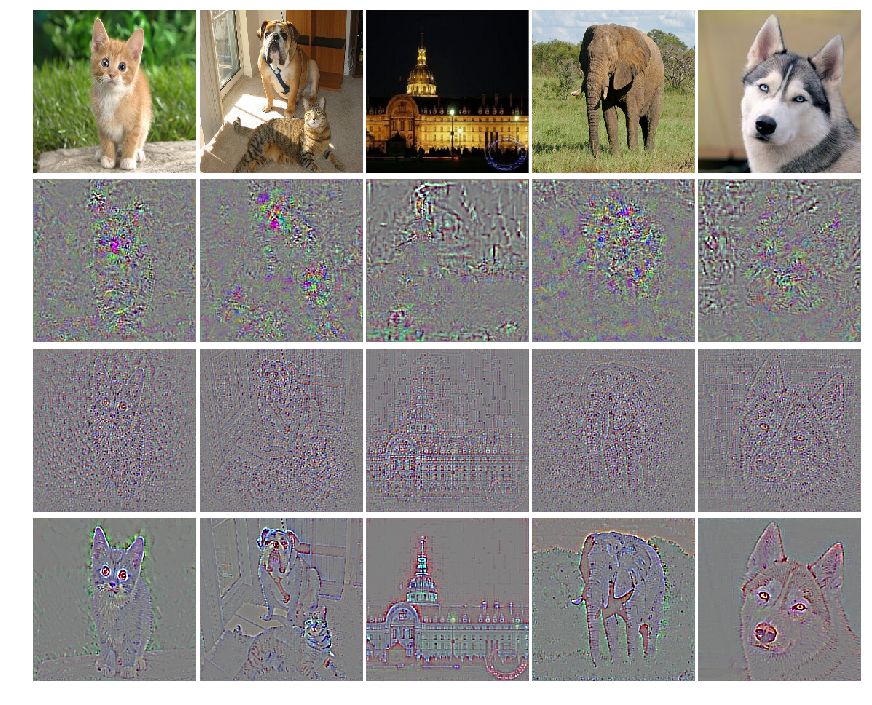

In [8]:
plt.figure(figsize=(20, 20))
left  = 0.125  # the left side of the subplots of the figure
right = 0.7    # the right side of the subplots of the figure
bottom = 0.23   # the bottom of the subplots of the figure
top = 0.7      # the top of the subplots of the figure
wspace = 0.02   # the amount of width reserved for blank space between subplots
hspace = 0.0   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)

for idx in range(len(gradients_backprop)):    
    img = cv2.imread(img_paths[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_width, img_height))
    
    plt.subplot(4, 5, idx+1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(4, 5, 5 + idx+1)
    plt.imshow(deprocess_image(gradients_backprop[idx]))
    plt.axis('off')
    
    plt.subplot(4, 5, 10 + idx+1)
    plt.imshow(deprocess_image(gradients_deconv[idx]))
    plt.axis('off')
    
    plt.subplot(4, 5, 15 + idx+1)
    plt.imshow(deprocess_image(gradients_guidedbackprop[idx]))
    plt.axis('off')